# Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, add, Activation, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Import Dataset

In [2]:
from sklearn.datasets import fetch_lfw_people
dataset = fetch_lfw_people(min_faces_per_person=60, resize=0.8, color=True)

# Exploratory data analysis

In [3]:
data_shape = dataset.data.shape
data_shape


(1348, 22500)

In [4]:
print(f"Shape of data: {dataset.images.shape}")

Shape of data: (1348, 100, 75, 3)


In [5]:
print(f"Image shape: {dataset.images[0].shape}")
print(f"Number of images: {dataset.data.shape[0]}")
print(f"Number of classes: {len(np.unique(dataset.target))}")

Image shape: (100, 75, 3)
Number of images: 1348
Number of classes: 8


In [95]:
#Verify the name of the celebrity and the shape of the input image
print(dataset.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


C:\Users\votua\AppData\Local\Temp\ipykernel_16380\856392842.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=images_per_person.index, y=images_per_person.values, palette="viridis")
C:\Users\votua\AppData\Local\Temp\ipykernel_16380\856392842.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')


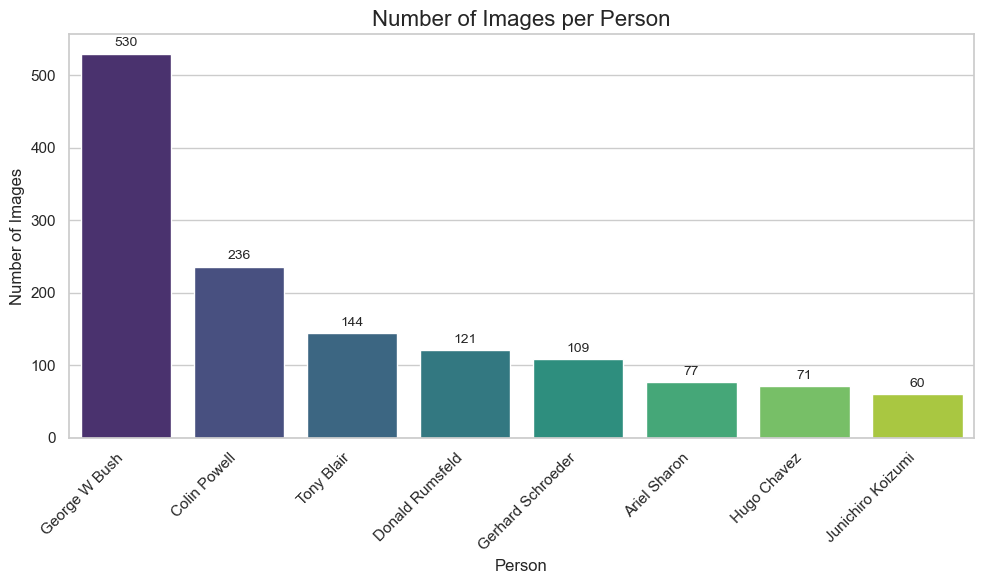

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dataframe for better visual analysis
df = pd.DataFrame({'Person': dataset.target, 'Name': dataset.target_names[dataset.target]})

# Count the number of images per person
images_per_person = df['Name'].value_counts()

# Set seaborn style for a cleaner visual
sns.set(style="whitegrid")

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=images_per_person.index, y=images_per_person.values, palette="viridis")

# Customize the plot
bar_plot.set_title("Number of Images per Person", fontsize=16)
bar_plot.set_ylabel("Number of Images", fontsize=12)
bar_plot.set_xlabel("Person", fontsize=12)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')

# Add data labels on top of the bars
for i, v in enumerate(images_per_person.values):
    bar_plot.text(i, v + 10, str(v), ha='center', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


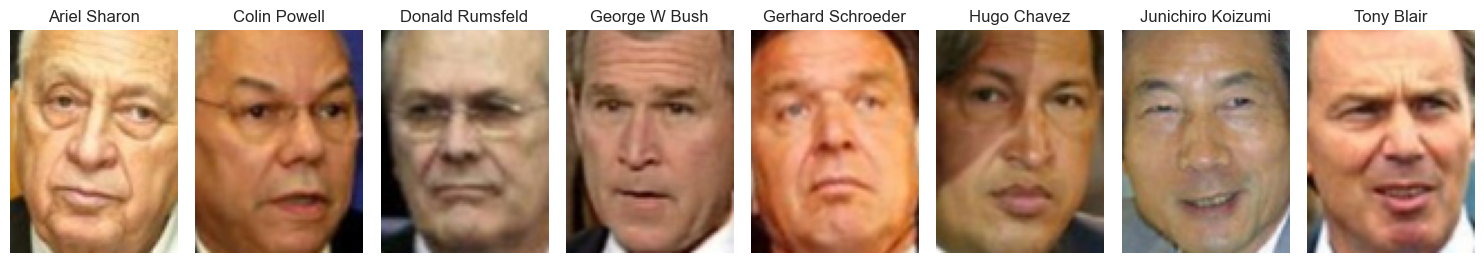

In [74]:
# Plot one sample image for each class in the dataset
fig, axes = plt.subplots(1, 8, figsize=(15, 8)) 

# Fetch unique classes from the dataset
unique_classes = np.unique(dataset.target)

# Loop through and plot one image per class
for i, ax in enumerate(axes.flat[:len(unique_classes)]):
    # Pick the first image of each class
    class_idx = np.where(dataset.target == unique_classes[i])[0][0]
    
    # Plot the image corresponding to the class
    ax.imshow(dataset.images[class_idx], cmap='gray')
    ax.set_title(dataset.target_names[dataset.target[class_idx]])
    ax.axis('off')

plt.tight_layout()
plt.show()



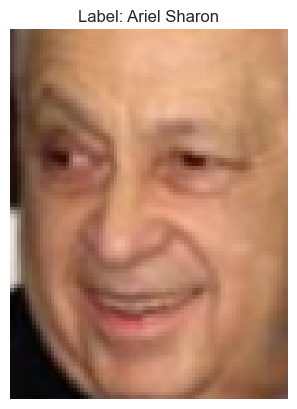

In [246]:
import random
def show_random_image_lfw(X_data, y_data, target_names):
    # Generate a random index
    random_idx = random.randint(0, X_data.shape[0] - 1)
    
    # Select the random image and corresponding label
    random_image = dataset.images[random_idx]
    random_label = dataset.target[random_idx]

    # Display the image with its corresponding label
    plt.imshow(random_image, cmap='gray')
    plt.title(f"Label: {target_names[random_label]}")
    plt.axis('off')  # Hide axis labels
    plt.show()

# Display a random image from the LFW dataset
show_random_image_lfw(X, y, target_names)

Analyze Image Data

Mean pixel intensity: 0.5087102055549622
Standard deviation of pixel intensity: 0.20899443328380585


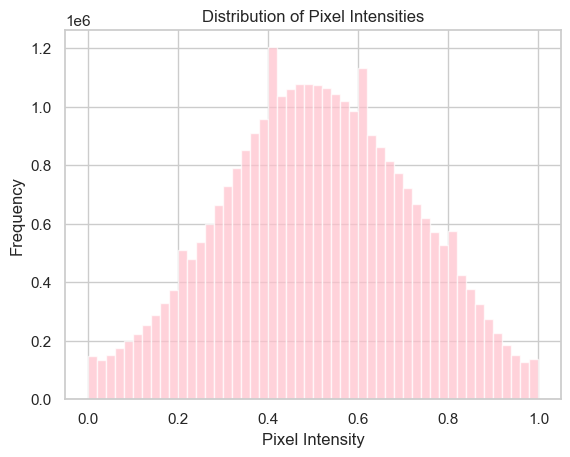

In [9]:
# Flatten the images to analyze pixel intensities
pixel_values = dataset.data

# Check mean and standard deviation of pixel intensities
print(f"Mean pixel intensity: {np.mean(pixel_values)}")
print(f"Standard deviation of pixel intensity: {np.std(pixel_values)}")

# Plot the histogram of pixel intensities
plt.hist(pixel_values.ravel(), bins=50, color='pink', alpha=0.7)
plt.title("Distribution of Pixel Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


**Key Observations:**
1. Symmetry Around Mid-Range: The distribution seems to peak around 0.5, indicating that most pixel values are in the medium intensity range. This suggests that the images are generally well-balanced in terms of brightness and contrast.

2. Potential Preprocessing: The relatively even distribution suggests that the pixel intensities are already well-distributed.

# Data Preprocessing

## Reshape Data

According to jounral of Verma (2020), the input data to CNN is 4D array so that we need to reshape data to 4D array: (samples, width, height, channels).

In [5]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X = dataset.images
y = dataset.target

# Shuffle the dataset to randomize the order of the samples
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

In [6]:

# Split the features and target variable into 'data' and 'test' sets with an 80-20 ratio
X_data, X_test, y_data, y_test = train_test_split(
    X_shuffled,
    y_shuffled,
    test_size=0.2,    # 20% for the test set
    random_state=42,  
)

# Further split the 'data' set into 'training' and 'validation' sets with an 80-20 ratio
X_train, X_val, y_train, y_val = train_test_split(
    X_data,
    y_data,
    test_size=0.2,    # 20% of the 'data' set for the validation set
    random_state=42,  
)

# Check the shapes of the split data
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 862
Validation set size: 216
Test set size: 270


In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 3)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)

In [8]:
print(X_train.shape)
print(y_train.shape)

(862, 100, 75, 3)
(862,)


## Converting y to One-Hot Encoding:

In [9]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train_onehot: {y_train.shape}")


Shape of X_train: (862, 100, 75, 3)
Shape of y_train_onehot: (862,)


In [10]:
print(f"Unique classes in y_train: {np.unique(y_train)}")


Unique classes in y_train: [0 1 2 3 4 5 6 7]


In [11]:
target_names=dataset.target_names

In [12]:
from tensorflow.keras.utils import to_categorical

num_class = len(np.unique(y))

# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=num_class)
y_val = to_categorical(y_val, num_classes=num_class)
y_test = to_categorical(y_test, num_classes=num_class)


print(f"Shape of y_train after one-hot encoding: {y_train.shape}")
print(f"Shape of y_val after one-hot encoding: {y_val.shape}")
print(f"Shape of y_test after one-hot encoding: {y_test.shape}")

Shape of y_train after one-hot encoding: (862, 8)
Shape of y_val after one-hot encoding: (216, 8)
Shape of y_test after one-hot encoding: (270, 8)


## Normalizing input

In [13]:
# Normalizing the Data (Scaling pixel values to [0, 1])
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0


# Modelling

## Build Baseline Model
----

**CNN Architecture:**
- **Conv1**: 16 filters, 5x5 kernel size
- **Conv2**: 32 filters, 5x5 kernel size
- **Pooling1**: 2x2 pooling size
- **Pooling2**: 2x2 pooling size
- **Fully Connected Layer**
- **Dropout**: 0.5 dropout rate
- **Output Layer**:  Softmax for multi-class classification



In [14]:
# Define the CNN model
def base_model(input_shape, num_classes):
    model = Sequential()

    # Input Layer and Conv Layer 1: 16 filters, 5x5 kernel
    model.add(Conv2D(16, (5, 5), activation='relu', padding='same', input_shape=input_shape))
    
    # Pooling Layer 1
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Conv Layer 2: 32 filters, 5x5 kernel
    model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
    
    # Pooling Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten Layer
    model.add(Flatten())

    # Fully Connected Layer: 128 units
    model.add(Dense(128, activation='relu'))

    # Dropout to prevent overfitting
    model.add(Dropout(0.5))

    # Output Layer: Softmax for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Assuming input images are of shape (100, 75, 3) and there are 8 output classes
input_shape = (100, 75, 3)
num_classes = 8

# Instantiate and summarize the model
base_model = base_model(input_shape, num_classes)
base_model.summary()


c:\Users\votua\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 75, 16)    │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 37, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,858,408 (7.09 MB)

 Trainable params: 1,858,408 (7.09 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


In [16]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import time
import os

# Define a log directory for TensorBoard (each run will have a unique log directory)
experiment_name = "Base_model_5x5_16_32"
log_dir = os.path.join("logs", "fit", "5x5_16_32")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [17]:
import time
import tensorflow as tf

# Fit the model and include the TensorBoard and EarlyStopping callbacks
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# Start timer before training
start_time_A = time.time()

# Train the model
history_base = base_model.fit(X_train, y_train, epochs=150, batch_size=100, 
                              verbose=1, validation_split=0.1, 
                              callbacks=[tensorboard_callback, early_stopping_callback])

# End timer after training
end_time_A = time.time()

# Calculate and print the total training time
training_time_base_model = end_time_A - start_time_A
print(f"Training time for the model: {training_time_base_model:.2f} seconds")


Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 0.3136 - loss: 2.0033 - val_accuracy: 0.4943 - val_loss: 1.6760
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.3870 - loss: 1.8099 - val_accuracy: 0.4943 - val_loss: 1.7071
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.4095 - loss: 1.7814 - val_accuracy: 0.4943 - val_loss: 1.6805
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.3835 - loss: 1.8540 - val_accuracy: 0.4943 - val_loss: 1.6398
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.3982 - loss: 1.8143 - val_accuracy: 0.4943 - val_loss: 1.6869
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.4122 - loss: 1.7903 - val_accuracy: 0.4943 - val_loss: 1.6587
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.4044 - loss: 1.7776 - val_accuracy: 0.4943 - val_loss: 1.6875
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.4204 - loss: 1.7829 - val_accuracy: 0.4943 - v

In [18]:
# Make predictions on the validation set using the base_model
base_val_pred = base_model.predict(X_val)
base_val_pred_labels = np.argmax(base_val_pred, axis=1)  # Convert probabilities to class labels
base_y_val_labels = np.argmax(y_val, axis=1)  # Convert one-hot encoded true labels to class labels

# Calculate accuracy and loss for the validation set
base_val_loss, base_val_accuracy = base_model.evaluate(X_val, y_val, verbose=1)


# Print validation loss and accuracy
print(f"Validation Loss: {base_val_loss}, Validation Accuracy: {base_val_accuracy}")

# Print classification report (precision, recall, f1-score, and support for each class)
print("\nClassification Report on Validation Set:")
print(classification_report(base_y_val_labels, base_val_pred_labels, target_names=target_names))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8582 - loss: 0.9327
Validation Loss: 1.145741581916809, Validation Accuracy: 0.8287037014961243

Classification Report on Validation Set:
                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.77      0.83        13
     Colin Powell       0.81      0.88      0.84        33
  Donald Rumsfeld       0.71      0.59      0.65        17
    George W Bush       0.81      0.97      0.88        78
Gerhard Schroeder       0.83      0.75      0.79        20
      Hugo Chavez       1.00      0.56      0.72        16
Junichiro Koizumi       1.00      0.88      0.93         8
       Tony Blair       0.85      0.74      0.79        31

         accuracy                           0.83       216
        macro avg       0.87      0.77      0.80       216
     weighted avg       0.84      0.83      0.82       216



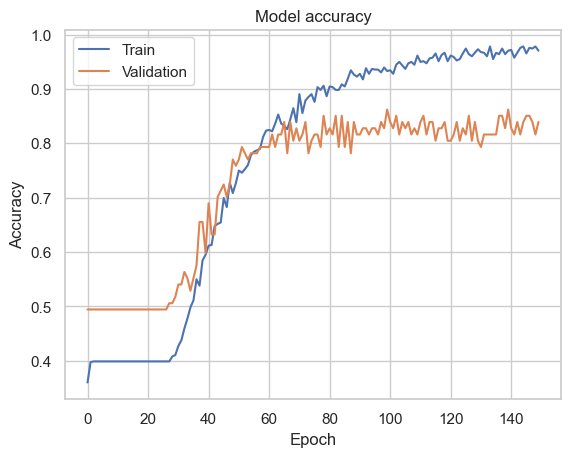

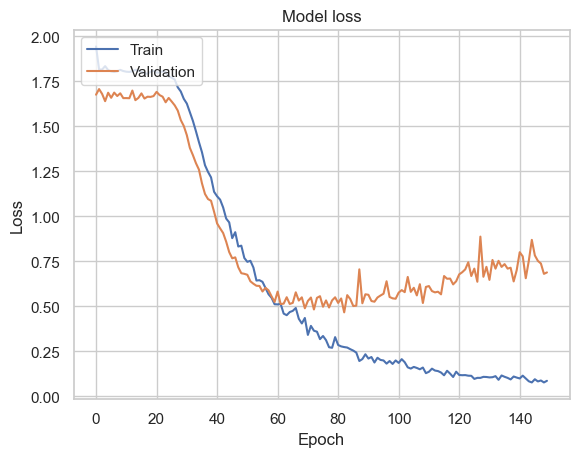

In [59]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_base.history['accuracy'])
plt.plot(history_base.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_base.history['loss'])
plt.plot(history_base.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model Experiment 

### Changing Kernel Size
----
**CNN Model Architecture:**
- **Conv1**: 16 filters, **3x3 kernel size**
- **Conv2**: 32 filters, **3x3 kernel size**
- **MaxPooling** after every convolutional layer.
- **Dropout** to prevent overfitting.
- **Fully Connected Layer**: Dense layer with 128 units.
- **Output Layer**: `softmax` activation for multi-class classification.


In [20]:
# Define the CNN model B with kenerl 3*3
def model_B(input_shape, num_classes):
    model = Sequential()

    # Input Layer and Conv Layer 1: 16 filters, 3x3 kernel
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    
    # Pooling Layer 1
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Conv Layer 2: 32 filters, 3x3 kernel
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    
    # Pooling Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten Layer
    model.add(Flatten())

    # Fully Connected Layer: 128 units
    model.add(Dense(128, activation='relu'))

    # Dropout to prevent overfitting
    model.add(Dropout(0.5))

    # Output Layer: Softmax for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Assuming input images are of shape (100, 75, 3) and there are 8 output classes
input_shape = (100, 75, 3)
num_classes = 8

# Instantiate and summarize the model
model_B = model_B(input_shape, num_classes)
model_B.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 100, 75, 16)    │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,849,448 (7.06 MB)

 Trainable params: 1,849,448 (7.06 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import time

# Define a log directory for TensorBoard (each run will have a unique log directory)
experiment_name = "3x3_16_32"  
log_dir = "logs/fit/" + ("3x3_16_32")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit the model and include the TensorBoard callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# Start timer before training
start_time_B = time.time()

history_B = model_B.fit(X_train, y_train, epochs=150, batch_size=100, 
                             verbose=1, validation_split=0.1, 
                             callbacks=[tensorboard_callback, callback])

# End timer after training
end_time_B = time.time()

# Calculate and print the total training time
training_time_model_B = end_time_B - start_time_B
print(f"Training time for the model: {training_time_model_B:.2f} seconds")

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.2979 - loss: 2.0322 - val_accuracy: 0.4943 - val_loss: 1.6333
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.3976 - loss: 1.8504 - val_accuracy: 0.4943 - val_loss: 1.7057
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.4005 - loss: 1.8402 - val_accuracy: 0.4943 - val_loss: 1.6497
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.3914 - loss: 1.8332 - val_accuracy: 0.4943 - val_loss: 1.6691
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.3864 - loss: 1.8544 - val_accuracy: 0.4943 - val_loss: 1.6455
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.3784 - loss: 1.8576 - val_accuracy: 0.4943 - val_loss: 1.6601
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.3843 - loss: 1.8140 - val_accuracy: 0.4943 - val_loss: 1.6688
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.3927 - loss: 1.8220 - val_accuracy: 0.4943 - v

In [22]:
# Make predictions on the validation set using the model_B
model_B_val_pred = model_B.predict(X_val)
model_B_val_pred_labels = np.argmax(model_B_val_pred, axis=1)  # Convert probabilities to class labels
model_B_y_val_labels = np.argmax(y_val, axis=1)  # Convert one-hot encoded true labels to class labels

# Calculate accuracy and loss for the validation set
model_B_val_loss, model_B_val_accuracy = model_B.evaluate(X_val, y_val, verbose=1)


# Print validation loss and accuracy
print(f"Validation Loss: {model_B_val_loss}, Validation Accuracy: {model_B_val_accuracy}")

# Print classification report (precision, recall, f1-score, and support for each class)
print("\nClassification Report on Validation Set:")
print(classification_report(model_B_y_val_labels, model_B_val_pred_labels, target_names=target_names))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8737 - loss: 0.6266
Validation Loss: 0.7192731499671936, Validation Accuracy: 0.8472222089767456

Classification Report on Validation Set:
                   precision    recall  f1-score   support

     Ariel Sharon       0.90      0.69      0.78        13
     Colin Powell       0.76      0.94      0.84        33
  Donald Rumsfeld       0.67      0.59      0.62        17
    George W Bush       0.85      0.96      0.90        78
Gerhard Schroeder       0.94      0.75      0.83        20
      Hugo Chavez       1.00      0.62      0.77        16
Junichiro Koizumi       1.00      1.00      1.00         8
       Tony Blair       0.89      0.81      0.85        31

         accuracy                           0.85       216
        macro avg       0.88      0.80      0.82       216
     weighted avg       0.86      0.85      0.84       216



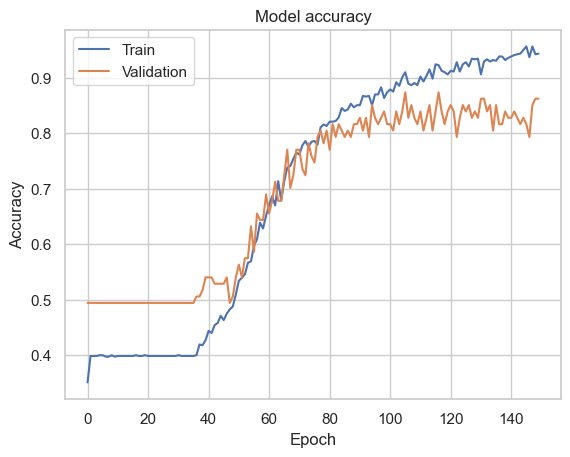

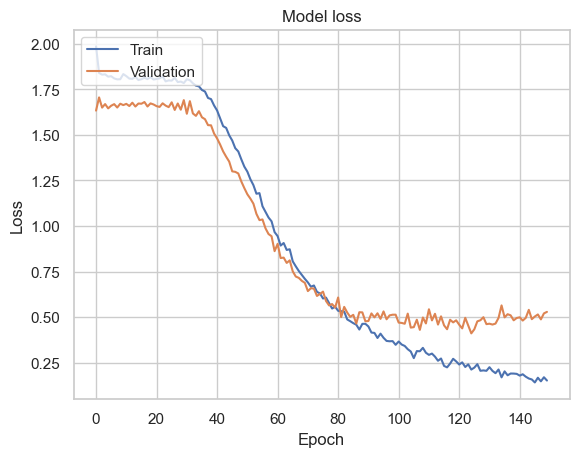

In [58]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_B.history['accuracy'])
plt.plot(history_B.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_B.history['loss'])
plt.plot(history_B.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

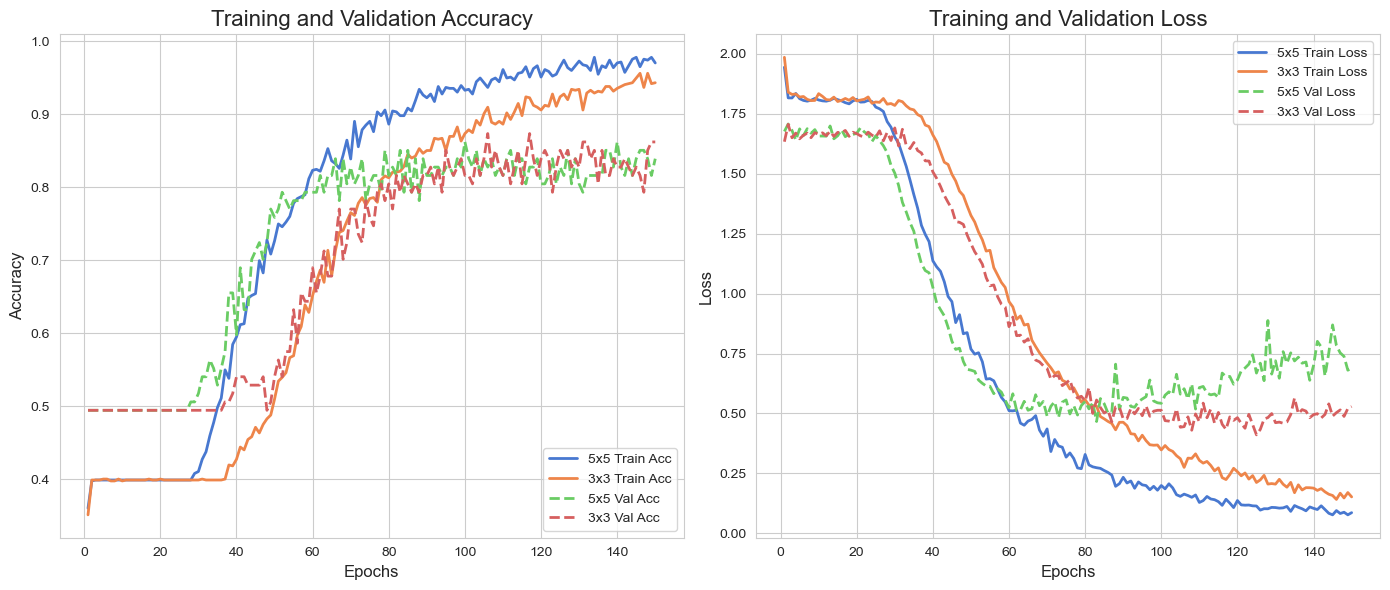

In [39]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_training_history_enhanced(history_base, history_B):
    # Extract relevant metrics
    metrics = ['accuracy', 'val_accuracy', 'loss', 'val_loss']
    base_metrics = {m: history_base.history[m] for m in metrics}
    B_metrics = {m: history_B.history[m] for m in metrics}
    
    # Find the minimum number of epochs to ensure both models are comparable
    min_epochs = min(len(base_metrics['accuracy']), len(B_metrics['accuracy']))
    epochs = range(1, min_epochs + 1)
    
    # Set up the visual style
    sns.set_style("whitegrid")
    palette = sns.color_palette("muted")
    
    # Create a figure for the plots
    plt.figure(figsize=(14, 6))
    
    ### Plot 1: Accuracy
    plt.subplot(1, 2, 1)
    # Training accuracy
    sns.lineplot(x=epochs, y=base_metrics['accuracy'][:min_epochs], label='5x5 Train Acc', color=palette[0], linewidth=2)
    sns.lineplot(x=epochs, y=B_metrics['accuracy'][:min_epochs], label='3x3 Train Acc', color=palette[1], linewidth=2)
    # Validation accuracy
    sns.lineplot(x=epochs, y=base_metrics['val_accuracy'][:min_epochs], label='5x5 Val Acc', color=palette[2], linestyle='--', linewidth=2)
    sns.lineplot(x=epochs, y=B_metrics['val_accuracy'][:min_epochs], label='3x3 Val Acc', color=palette[3], linestyle='--', linewidth=2)
    
    # Accuracy plot styling
    plt.title('Training and Validation Accuracy', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='lower right', fontsize=10)
    
    ### Plot 2: Loss
    plt.subplot(1, 2, 2)
    # Training loss
    sns.lineplot(x=epochs, y=base_metrics['loss'][:min_epochs], label='5x5 Train Loss', color=palette[0], linewidth=2)
    sns.lineplot(x=epochs, y=B_metrics['loss'][:min_epochs], label='3x3 Train Loss', color=palette[1], linewidth=2)
    # Validation loss
    sns.lineplot(x=epochs, y=base_metrics['val_loss'][:min_epochs], label='5x5 Val Loss', color=palette[2], linestyle='--', linewidth=2)
    sns.lineplot(x=epochs, y=B_metrics['val_loss'][:min_epochs], label='3x3 Val Loss', color=palette[3], linestyle='--', linewidth=2)
    
    # Loss plot styling
    plt.title('Training and Validation Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='upper right', fontsize=10)
    
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

# Example usage
plot_training_history_enhanced(history_base, history_B)


### Changing Number of Filters
----
**CNN Model Architecture:**
- **Conv1**: **(16,32,48,64)** filters, 3x3 kernel size
- **Conv2**: **(32,64,96,128)** filters, 3x3 kernel size
- **MaxPooling** after every convolutional layer.
- **Dropout** to prevent overfitting.
- **Fully Connected Layer**: Dense layer with 128 units.
- **Output Layer**: `softmax` activation for multi-class classification.

In [24]:
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN model with configurable filter sizes
def test_dynamic_conv_layers(input_shape, num_classes, conv1_filters, conv2_filters):
    model = Sequential()
    
    # Conv Layer 1 with configurable filters
    model.add(Conv2D(conv1_filters, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    
    # Conv Layer 2 with configurable filters
    model.add(Conv2D(conv2_filters, (3, 3), activation='relu', padding='same'))
    
    # Pooling Layer: MaxPooling to downsample
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Dropout to prevent overfitting
    model.add(Dropout(0.25))
    
    # Flatten the output from the conv layers
    model.add(Flatten())
    
    # Fully Connected Layer: Dense layer with 128 units
    model.add(Dense(128, activation='relu'))
    
    # Dropout for further overfitting prevention
    model.add(Dropout(0.5))
    
    # Output Layer: Softmax for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Assuming input images are of shape (100, 75, 3) and there are 8 output classes
input_shape = (100, 75, 3)
num_classes = 8

In [25]:
# Build the model with specific filters
model_C = test_dynamic_conv_layers(input_shape, num_classes, 32, 64)
model_C.summary()

c:\Users\votua\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 100, 75, 32)    │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 100, 75, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 50, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 118400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    15,155,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,175,752 (57.89 MB)

 Trainable params: 15,175,752 (57.89 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Define a log directory for TensorBoard (each run will have a unique log directory)
experiment_name = "3x3_32_64"  
log_dir = "logs/fit/" + ("3x3_32_64")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit the model and include the TensorBoard callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# Start timer before training
start_time_C = time.time()

history_C = model_C.fit(X_train, y_train, epochs=150, batch_size=100, 
                             verbose=1, validation_split=0.1, 
                             callbacks=[tensorboard_callback, callback])

# End timer after training
end_time_C = time.time()

# Calculate and print the total training time
training_time_model_C = end_time_C - start_time_C
print(f"Training time for the model: {training_time_model_C:.2f} seconds")

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.3130 - loss: 1.9633 - val_accuracy: 0.4943 - val_loss: 1.7167
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 883ms/step - accuracy: 0.3981 - loss: 1.8191 - val_accuracy: 0.4943 - val_loss: 1.6694
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 847ms/step - accuracy: 0.3877 - loss: 1.8301 - val_accuracy: 0.4943 - val_loss: 1.6534
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 876ms/step - accuracy: 0.4105 - loss: 1.7952 - val_accuracy: 0.4943 - val_loss: 1.7122
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 912ms/step - accuracy: 0.4015 - loss: 1.8261 - val_accuracy: 0.4943 - val_loss: 1.6959
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 862ms/step - accuracy: 0.3933 - loss: 1.8260 - val_accuracy: 0.4943 - val_loss: 1.6458
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 853ms/step - accuracy: 0.3945 - loss: 1.8320 - val_accuracy: 0.4943 - val_loss: 1.6507
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 855ms/step - accuracy: 0.3905 - loss: 1.8249 - val_accuracy: 0.4943 - val

In [27]:
# Build the model with specific filters
model_D = test_dynamic_conv_layers(input_shape, num_classes, 48, 96)
model_D.summary()

c:\Users\votua\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 100, 75, 48)    │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 100, 75, 96)    │        41,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 50, 37, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50, 37, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 177600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    22,732,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,776,872 (86.89 MB)

 Trainable params: 22,776,872 (86.89 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Define a log directory for TensorBoard (each run will have a unique log directory)
experiment_name = "3x3_48_96"  
log_dir = "logs/fit/" + ("3x3_48_96")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit the model and include the TensorBoard callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# Start timer before training
start_time_D = time.time()

history_D = model_D.fit(X_train, y_train, epochs=150, batch_size=100, 
                             verbose=1, validation_split=0.1, 
                             callbacks=[tensorboard_callback, callback])

# End timer after training
end_time_D = time.time()

# Calculate and print the total training time
training_time_model_D = end_time_D - start_time_D
print(f"Training time for the model: {training_time_model_D:.2f} seconds")

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.3039 - loss: 1.9980 - val_accuracy: 0.4943 - val_loss: 1.8310
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3626 - loss: 1.8658 - val_accuracy: 0.4943 - val_loss: 1.7025
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3821 - loss: 1.8398 - val_accuracy: 0.4943 - val_loss: 1.6442
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3883 - loss: 1.8252 - val_accuracy: 0.4943 - val_loss: 1.6765
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4014 - loss: 1.8189 - val_accuracy: 0.4943 - val_loss: 1.6674
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.3956 - loss: 1.8365 - val_accuracy: 0.4943 - val_loss: 1.6836
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4026 - loss: 1.8138 - val_accuracy: 0.4943 - val_loss: 1.7227
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4015 - loss: 1.8040 - val_accuracy: 0.4943 - val_loss: 1.6685


In [38]:
# Build the model with specific filters
model_E = test_dynamic_conv_layers(input_shape, num_classes, 64, 128)
model_E.summary()

c:\Users\votua\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 100, 75, 64)    │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 100, 75, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 50, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 236800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    30,310,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,387,208 (115.92 MB)

 Trainable params: 30,387,208 (115.92 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Define a log directory for TensorBoard (each run will have a unique log directory)
experiment_name = "3x3_64_128"  
log_dir = "logs/fit/" + ("3x3_64_128")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit the model and include the TensorBoard callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# Start timer before training
start_time_E = time.time()

history_E = model_E.fit(X_train, y_train, epochs=150, batch_size=100, 
                             verbose=1, validation_split=0.1, 
                             callbacks=[tensorboard_callback, callback])

# End timer after training
end_time_E = time.time()

# Calculate and print the total training time
training_time_model_E = end_time_E - start_time_E
print(f"Training time for the model: {training_time_model_E:.2f} seconds")

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.2866 - loss: 1.9865 - val_accuracy: 0.4943 - val_loss: 1.9069
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.3792 - loss: 1.9013 - val_accuracy: 0.4943 - val_loss: 1.6723
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.4090 - loss: 1.8053 - val_accuracy: 0.4943 - val_loss: 1.6714
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.3828 - loss: 1.8478 - val_accuracy: 0.4943 - val_loss: 1.6997
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.4011 - loss: 1.8405 - val_accuracy: 0.4943 - val_loss: 1.6964
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.3916 - loss: 1.8429 - val_accuracy: 0.4943 - val_loss: 1.6698
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.3707 - loss: 1.8695 - val_accuracy: 0.4943 - val_loss: 1.6833
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.3878 - loss: 1.8607 - val_accuracy: 0.4943 - val_loss: 1.7258


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_all_histories(histories, model_labels):
    """
    Function to plot training and validation accuracy and loss for multiple models.
    
    Parameters:
    - histories: List of history objects returned by model.fit() for each model.
    - model_labels: List of labels (strings) corresponding to the models, for legend.
    """
    # Set up the visual style
    sns.set_style("whitegrid")
    palette = sns.color_palette("muted", len(histories))  # Generate distinct colors

    # Initialize plot figure
    plt.figure(figsize=(14, 10))

    # Plot training and validation accuracy for all models
    plt.subplot(2, 1, 1)
    for i, history in enumerate(histories):
        epochs = range(1, len(history.history['accuracy']) + 1)
        sns.lineplot(x=epochs, y=history.history['accuracy'], label=f'{model_labels[i]} Train Acc', color=palette[i], linewidth=2)
        sns.lineplot(x=epochs, y=history.history['val_accuracy'], label=f'{model_labels[i]} Val Acc', linestyle='--', color=palette[i], linewidth=2)

    plt.title('Training and Validation Accuracy Comparison', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='lower right', fontsize=10)

    # Plot training and validation loss for all models
    plt.subplot(2, 1, 2)
    for i, history in enumerate(histories):
        epochs = range(1, len(history.history['loss']) + 1)
        sns.lineplot(x=epochs, y=history.history['loss'], label=f'{model_labels[i]} Train Loss', color=palette[i], linewidth=2)
        sns.lineplot(x=epochs, y=history.history['val_loss'], label=f'{model_labels[i]} Val Loss', linestyle='--', color=palette[i], linewidth=2)

    plt.title('Training and Validation Loss Comparison', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='upper right', fontsize=10)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


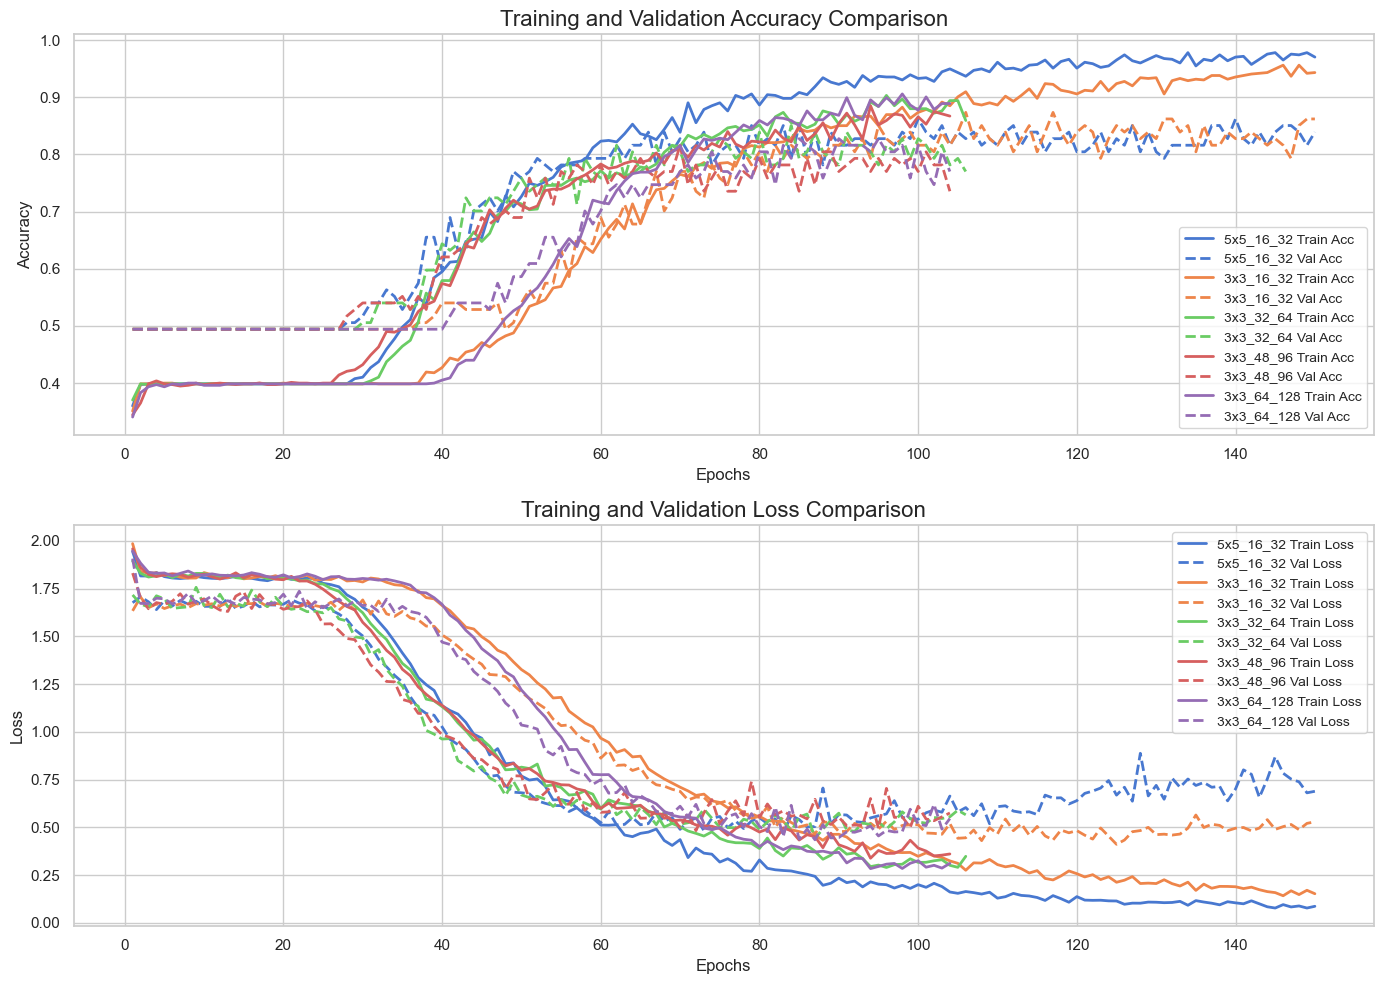

In [61]:

histories = [history_base, history_B, history_C, history_D, history_E]
model_labels = ['5x5_16_32', '3x3_16_32', '3x3_32_64', '3x3_48_96','3x3_64_128']
plot_all_histories(histories, model_labels)

**Models:**
1. 5x5, 16, 32: Blue line
2. 3x3, 16, 32: Orange line
3. 3x3, 32, 64: Green line
4. 3x3, 48, 96: Red line
5. 3x3, 64, 128: Purple line

**Key Insights from Accuracy:**
- The 3x3, 16, 32 model (Orange) achieves the best balance between training and validation accuracy, indicating strong generalization.
- The 5x5, 16, 32 model (Blue) shows the highest training accuracy but overfits the most, evidenced by its lower validation accuracy.
- The deeper 3x3 models (Red, Purple) seem to converge more slowly and show less performance improvement compared to their smaller counterparts.


**Key Insights from Loss:**
- The 3x3, 16, 32 model (Orange) again stands out with the best validation loss performance, suggesting that it generalizes better than the other models.
- The 5x5 model (Blue) performs well on training data but exhibits higher validation loss, reinforcing its overfitting issue.
- The deeper 3x3 models (Red, Purple) have slower convergence and higher validation loss, suggesting they are less effective for this specific task.

**General Conclusion:**
- Best Performing Model: The **3x3, 16, 32 model** (Orange) strikes the best balance between training and validation performance. It has a high validation accuracy (~85%) and low validation loss (~0.5), indicating strong generalization.
- Overfitting in the 5x5 Model: The **5x5, 16, 32 model** (Blue) achieves the highest training accuracy (~90%), but its lower validation accuracy (~80%) and higher validation loss indicate overfitting.
- Slower Learning in Deeper 3x3 Models: The deeper models with **3x3 kernels** (Red, Purple) converge more slowly and show less improvement in validation accuracy and loss, suggesting they are less suited to this task or need further tuning.


C:\Users\votua\AppData\Local\Temp\ipykernel_22320\4018742287.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=times, palette='muted')


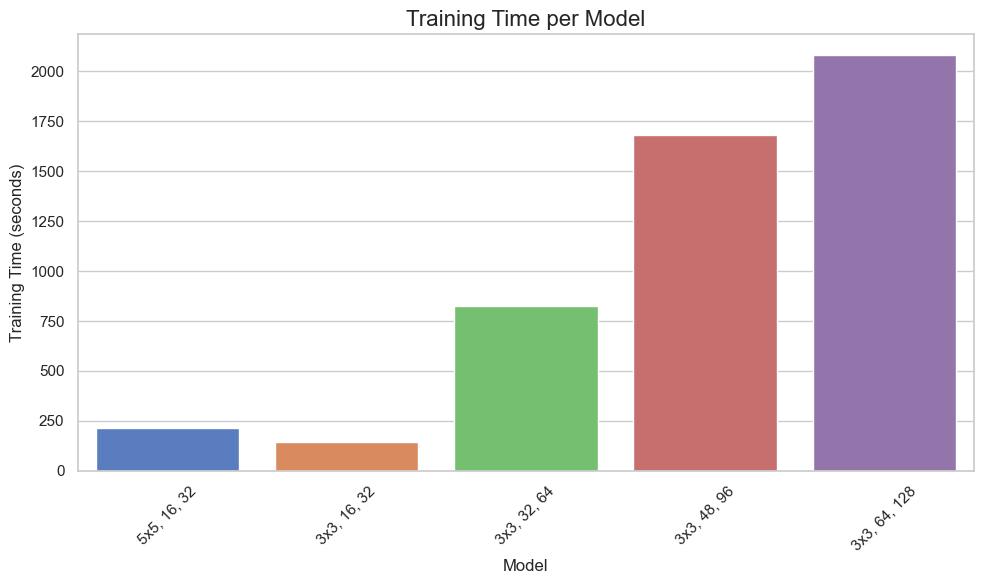

In [62]:
training_times = {
    '5x5, 16, 32': training_time_base_model,
    '3x3, 16, 32': training_time_model_B,
    '3x3, 32, 64': training_time_model_C,
    '3x3, 48, 96': training_time_model_D,
    '3x3, 64, 128': training_time_model_E
}

# Extract model names and corresponding training times
model_names = list(training_times.keys())
times = list(training_times.values())

# Set up the plot style
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=times, palette='muted')

# Add titles and labels
plt.title('Training Time per Model', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

- **Fewer Filters, Faster Training**: The models with fewer filters 5x5, 16, 32 and 3x3, 16, 32) trained the fastest, suggesting they have fewer parameters to learn and less computational overhead.
- **More Filters, Slower Training**: As the models grow deeper (3x3, 32, 64 and beyond), the training time increases significantly. This is a typical trade-off where deeper models require more training time but can capture more complex features in the data.


# Model Performance on Validation Set

In [49]:
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import load_model
import numpy as np

# Dictionary containing your models
models = {
    '5x5, 32, 64': base_model,
    '3x3, 16, 32': model_B,
    '3x3, 32, 64': model_3x3_16_32,
    '3x3, 48, 96': model_D,
    '3x3, 64, 128': model_E
}

# Dictionary to store the performance results
val_performance = {}

# Define the function to evaluate each model
def evaluate_model_on_val(model, model_name):
    # Make predictions on the validation set
    val_pred = model.predict(X_val)
    
    # Convert predicted probabilities to class labels
    val_pred_labels = np.argmax(val_pred, axis=1)
    
    # Convert one-hot encoded true labels to class labels
    y_val_labels = np.argmax(y_val, axis=1)
    
    # Calculate accuracy and loss for the validation set
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
    
    # Store performance in the dictionary
    val_performance[model_name] = {
        'Validation Accuracy': val_accuracy,
        'Validation Loss': val_loss
    }
    
    # Print classification report (precision, recall, f1-score)
    print(f"\nModel: {model_name}")
    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}\n")
    print("Classification Report:")
    print(classification_report(y_val_labels, val_pred_labels, target_names=target_names))




In [50]:
# Evaluate all models on the validation set
for model_name, model in models.items():
    evaluate_model_on_val(model, model_name)
    

# Optionally: Print the collected performance results
print("\nValidation Performance Summary:")
for model_name, performance in val_performance.items():
    print(f"{model_name}: Accuracy = {performance['Validation Accuracy']}, Loss = {performance['Validation Loss']}")

# Display test performance for all models
val_performance_df = pd.DataFrame.from_dict(val_performance, orient='index').reset_index()
val_performance_df.rename(columns={'index': 'Model', 'Validation Accuracy': 'Accuracy', 'Validation Loss': 'Loss'}, inplace=True)
print(val_performance_df)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8582 - loss: 0.9327 

Model: 5x5, 16, 32
Validation Loss: 1.145741581916809, Validation Accuracy: 0.8287037014961243

Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.77      0.83        13
     Colin Powell       0.81      0.88      0.84        33
  Donald Rumsfeld       0.71      0.59      0.65        17
    George W Bush       0.81      0.97      0.88        78
Gerhard Schroeder       0.83      0.75      0.79        20
      Hugo Chavez       1.00      0.56      0.72        16
Junichiro Koizumi       1.00      0.88      0.93         8
       Tony Blair       0.85      0.74      0.79        31

         accuracy                           0.83       216
        macro avg       0.87      0.77      0.80       216
     weighted avg       0.84      0.83      0.82       216

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━

C:\Users\votua\AppData\Local\Temp\ipykernel_22320\1168752693.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=val_performance_df, ax=ax[0], palette=colors)
C:\Users\votua\AppData\Local\Temp\ipykernel_22320\1168752693.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Loss', data=val_performance_df, ax=ax[1], palette=colors)


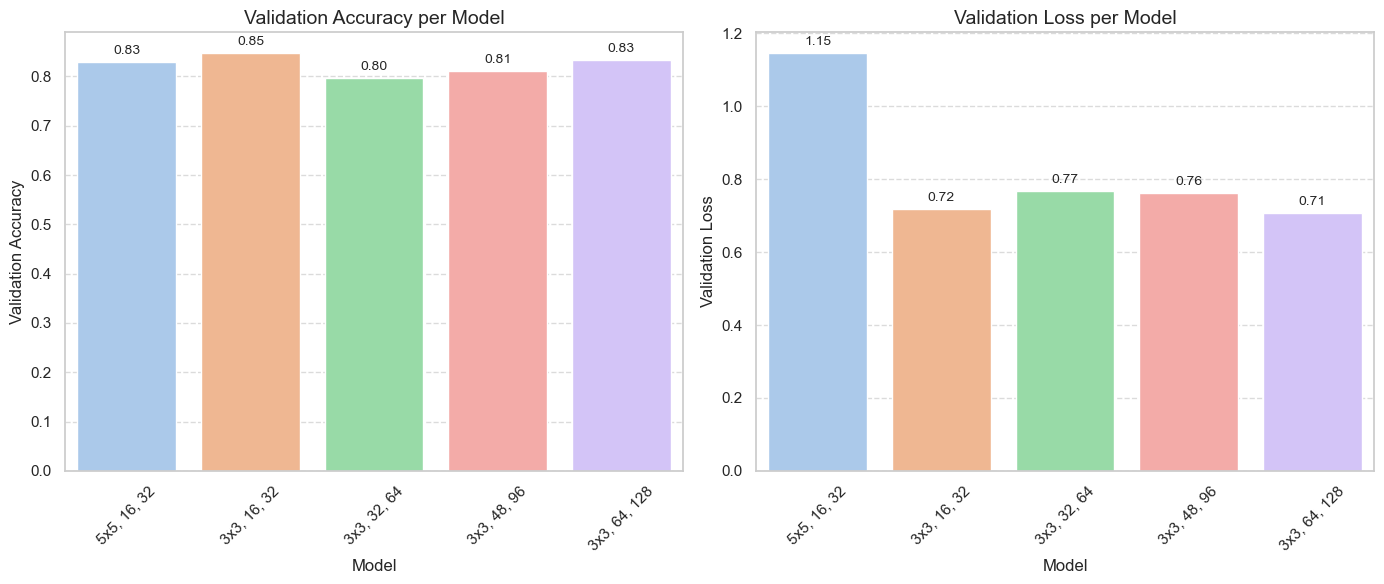

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Convert 'Model' column to string for better readability
val_performance_df['Model'] = val_performance_df['Model'].astype(str)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Define color palette for the bars
colors = sns.color_palette("pastel", len(val_performance_df['Model']))

# Bar plot for Validation Accuracy
sns.barplot(x='Model', y='Accuracy', data=val_performance_df, ax=ax[0], palette=colors)
ax[0].set_title('Validation Accuracy per Model', fontsize=14)
ax[0].set_xlabel('Model', fontsize=12)
ax[0].set_ylabel('Validation Accuracy', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with Accuracy values
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=10)

# Bar plot for Validation Loss
sns.barplot(x='Model', y='Loss', data=val_performance_df, ax=ax[1], palette=colors)
ax[1].set_title('Validation Loss per Model', fontsize=14)
ax[1].set_xlabel('Model', fontsize=12)
ax[1].set_ylabel('Validation Loss', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with Loss values
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=10)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Model Performance on Test Set

In [53]:
# Dictionary to store the performance results
test_performance = {}

# Define the function to evaluate each model on the test set
def evaluate_model_on_test(model, model_name):
    # Make predictions on the test set
    test_pred = model.predict(X_test)
    
    # Convert predicted probabilities to class labels
    test_pred_labels = np.argmax(test_pred, axis=1)
    
    # Convert one-hot encoded true labels to class labels
    y_test_labels = np.argmax(y_test, axis=1)
    
    # Calculate accuracy and loss for the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    
    # Store performance in the dictionary
    test_performance[model_name] = {
        'Test Accuracy': test_accuracy,
        'Test Loss': test_loss
    }
    
    # Print classification report (precision, recall, f1-score)
    print(f"\nModel: {model_name}")
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}\n")
    print("Classification Report:")
    print(classification_report(y_test_labels, test_pred_labels, target_names=target_names))


In [54]:
# Evaluate all models on the validation set
for model_name, model in models.items():
    evaluate_model_on_test(model, model_name)

# Display test performance for all models
test_performance_df = pd.DataFrame.from_dict(test_performance, orient='index').reset_index()
test_performance_df.rename(columns={'index': 'Model', 'Test Accuracy': 'Accuracy', 'Test Loss': 'Loss'}, inplace=True)
print(test_performance_df)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7896 - loss: 1.3025

Model: 5x5, 16, 32
Test Loss: 1.084985613822937, Test Accuracy: 0.8185185194015503

Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.85      0.65      0.73        17
     Colin Powell       0.84      0.89      0.86        63
  Donald Rumsfeld       0.53      0.47      0.50        17
    George W Bush       0.85      0.92      0.88       100
Gerhard Schroeder       0.76      0.64      0.70        25
      Hugo Chavez       0.86      0.55      0.67        11
Junichiro Koizumi       0.91      0.83      0.87        12
       Tony Blair       0.79      0.88      0.83        25

         accuracy                           0.82       270
        macro avg       0.80      0.73      0.76       270
     weighted avg       0.82      0.82      0.81       270

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

**Detailed Comparative Performance Analysis: 3x3, 16, 32 Model vs 3x3, 64, 128 Mode**

The 3x3, 16, 32 model delivers solid overall performance on the test set, with an accuracy of 81%. It handles majority classes like George W Bush and Colin Powell well, but struggles with underrepresented classes like Donald Rumsfeld and Hugo Chavez. The model performs best in terms of precision, meaning it makes relatively few misclassifications, but its recall varies more across classes, indicating that it sometimes misses identifying certain classes.

The 3x3, 64, 128 model performs well, achieving 81.1% accuracy with strong precision across most classes. It excels at correctly predicting the majority classes (such as George W Bush and Colin Powell), but struggles with some smaller classes like Donald Rumsfeld and Gerhard Schroeder, where recall is notably lower. The high precision values indicate that the model is reliable in terms of not making too many incorrect predictions, but further tuning or more data might be needed to improve recall for certain classes. 

# Model Evaluation

C:\Users\votua\AppData\Local\Temp\ipykernel_22320\1427202830.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=test_performance_df, palette=custom_colors, ax=ax[0])
C:\Users\votua\AppData\Local\Temp\ipykernel_22320\1427202830.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Loss', data=test_performance_df, palette=custom_colors, ax=ax[1])


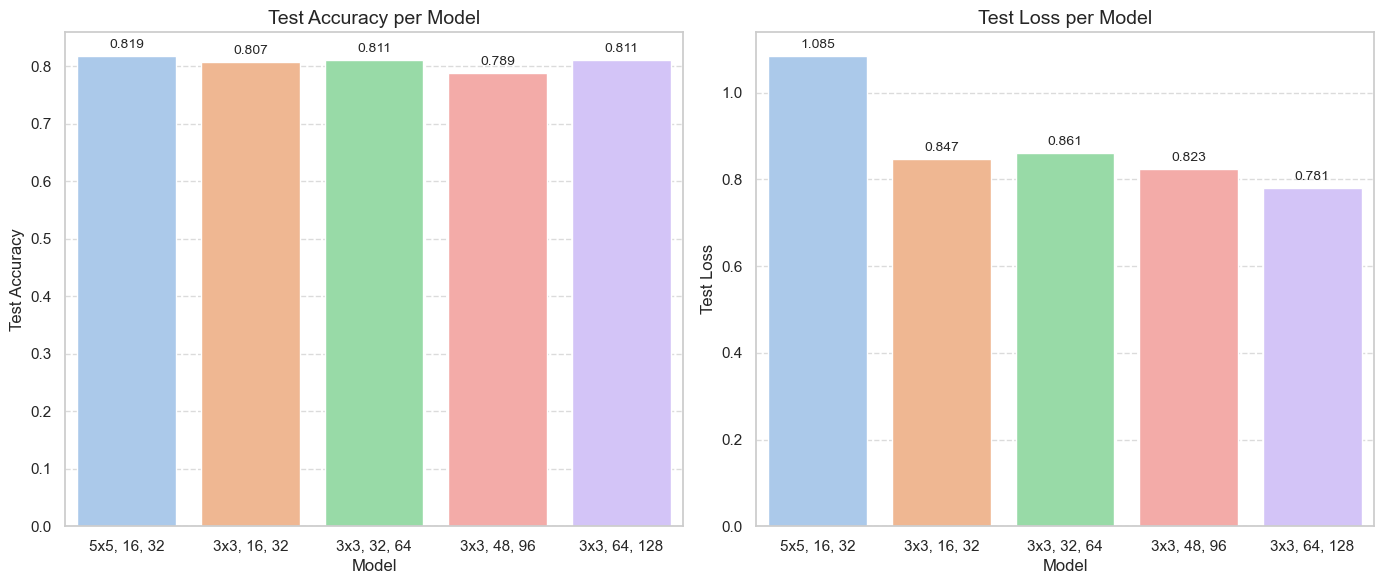

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Convert the 'Model' column to strings for better plotting
test_performance_df['Model'] = test_performance_df['Model'].astype(str)

# Set up a color palette
custom_colors = sns.color_palette("pastel", len(test_performance_df['Model']))

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for Test Accuracy
sns.barplot(x='Model', y='Accuracy', data=test_performance_df, palette=custom_colors, ax=ax[0])
ax[0].set_title('Test Accuracy per Model', fontsize=14)
ax[0].set_xlabel('Model', fontsize=12)
ax[0].set_ylabel('Test Accuracy', fontsize=12)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with Accuracy values
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=10)

# Bar plot for Test Loss
sns.barplot(x='Model', y='Loss', data=test_performance_df, palette=custom_colors, ax=ax[1])
ax[1].set_title('Test Loss per Model', fontsize=14)
ax[1].set_xlabel('Model', fontsize=12)
ax[1].set_ylabel('Test Loss', fontsize=12)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with Loss values
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


**Test Set Results Analysis**
Accuracy Summary:
- The 5x5, 16, 32 model has the highest test accuracy, followed closely by the 3x3, 32, 64 and 3x3, 64, 128 models. The 3x3, 16, 32 model performs slightly lower than expected, but it’s still competitive.
- The 3x3, 48, 96 model has the lowest test accuracy, indicating that it struggles the most to generalize.
Loss Summary:
- The 3x3, 64, 128 model has the lowest test loss, indicating that it generalizes better than the other models in terms of overall prediction reliability.
- The 5x5 model has the highest test loss, which suggests overfitting or difficulty in generalizing to unseen data, despite its relatively high accuracy.
---
**Conclusion:**
- The 3x3, 64, 128 model exhibits the lowest test loss and high test accuracy, making it the best performer in terms of both prediction accuracy and reliability.
- Despite a higher test loss, the 5x5 model still achieves the highest test accuracy, indicating that it performs well but may benefit from further regularization to reduce overfitting.
- The 3x3, 48, 96 model has the lowest test accuracy, indicating that it is the weakest performer and might not be as suitable for this task as the other models.

# Save Model and Deployment

In [63]:
model_C.save(r'C:\Users\votua\OneDrive - UTS\Semester 3\02. 32513 - Advanced Data Analytics Algorithms\02. Assignment\model_C.h5')
model_E.save(r'C:\Users\votua\OneDrive - UTS\Semester 3\02. 32513 - Advanced Data Analytics Algorithms\02. Assignment\model_E.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


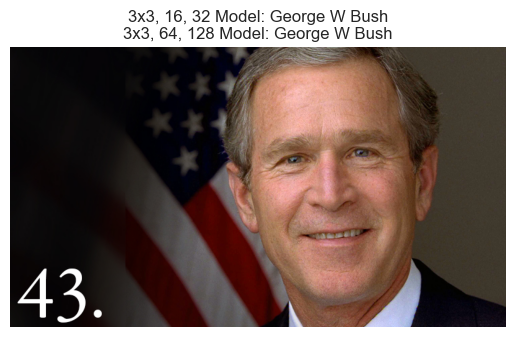

In [110]:
from tensorflow.keras.preprocessing import image

# Function to load and preprocess an image
def load_and_preprocess_image(img_path, img_size=(100, 75)):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

# Function to get predictions from both models
def get_predictions(img_array):
    pred_3x3_16_32 = model_B.predict(img_array)
    pred_3x3_64_128 = model_E.predict(img_array)
    return np.argmax(pred_3x3_16_32), np.argmax(pred_3x3_64_128)

# Function to display the image and predictions
def display_prediction(img_path, target_names):
    img_array = load_and_preprocess_image(img_path)
    
    # Get predictions from both models
    pred_3x3_16_32, pred_3x3_64_128 = get_predictions(img_array)
    
    # Display the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    
    # Display predictions
    plt.title(f"3x3, 16, 32 Model: {target_names[pred_3x3_16_32]}\n"
              f"3x3, 64, 128 Model: {target_names[pred_3x3_64_128]}")
    plt.show()

# Define the class names (target names)
target_names = ['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
                'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi', 'Tony Blair']

# Path to an image you want to test
img_path = r'C:\Users\votua\OneDrive - UTS\Semester 3\04. 42172 Introduction to Artificial Intelligence\03. Assessment\03.A1.3\pic3.jpg'

# Display the image and predictions
display_prediction(img_path, target_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


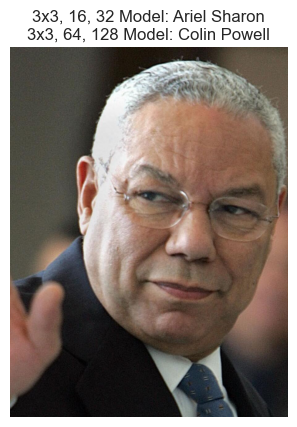

In [123]:
# Path to an image you want to test
img_path = r'C:\Users\votua\OneDrive - UTS\Semester 3\04. 42172 Introduction to Artificial Intelligence\03. Assessment\03.A1.3\pic4.jpg'
# Display the image and predictions
display_prediction(img_path, target_names)

# Conclusion

- **Impact of Kernel Size**: Smaller kernels (3x3), as seen in models like the 3x3, 16, 32, consistently outperformed larger kernels in terms of generalization, validation accuracy, and test reliability. The 5x5 model, despite good training accuracy, suffered from overfitting and poor generalization due to its inability to capture finer details in the data.

- **Impact of Filter Layers**: Increasing the number of filters improves a model's ability to learn more complex patterns, but it also significantly increases training time. The 3x3, 64, 128 model, for instance, had the longest training time but showed the best test loss, making it ideal for tasks that prioritize prediction reliability. However, the 3x3, 16, 32 model proved to be the most balanced, offering fast training and good generalization.

- **Best Model Overall**: The 3x3, 16, 32 model strikes the best balance between training efficiency, validation performance, and test generalization. It trains quickly and generalizes well to unseen data, making it a strong candidate for tasks where time efficiency and generalization are key. For tasks that prioritize prediction reliability, the 3x3, 64, 128 model may be more suitable despite its longer training time.
